## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the csv dataset
data = pd.read_csv("insurance.csv")

In [3]:
# Checking the first five rows of the dataset to have a view of how the dataset looks like
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Checking for missing values
data.isnull().sum().sort_values(ascending = False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Checking the statistical description of the numeric data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
# Checking more info about the dataset (dtype, no. of null values, etc)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Checking the shape of the dataset
data.shape

(1338, 7)

In [9]:
# Checking the columns in the dataset
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Exploratory Data Analysis

In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Age

In [11]:
# A statistical description of the age
data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

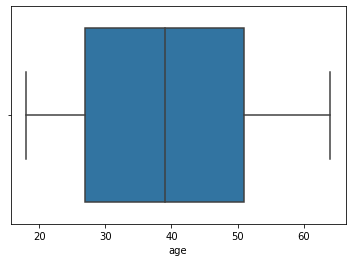

In [12]:
# Checking for outliers using a boxplot

sns.boxplot(data['age'])
plt.show()

<Figure size 576x360 with 0 Axes>

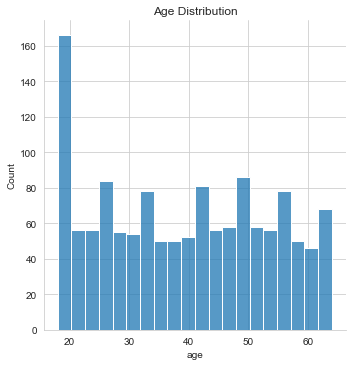

In [36]:
# Plotting a Frequency Distribution of the age
plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
sns.displot(data['age'], bins = 20)
plt.title('Age Distribution')
plt.show()

- With this we can say that the age group of the highest frequency is those who age is equal to 20 or a little older than 20. Sound Interesting right?

- Let's probe further!

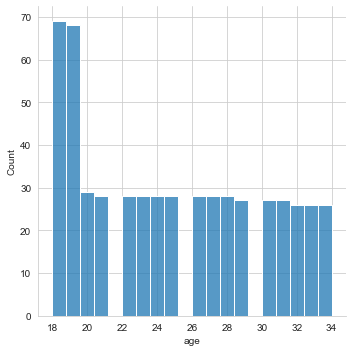

In [41]:
#Frequency Distribution of people with age less than 35
sns.displot(data['age'][data['age'] < 35], bins = 20)
plt.show()

- With this, we are now able to say the age group with the highest frequency is basically between 18 and 20

In [38]:
data['age'][data['age'] < 21]

0       19
1       18
15      19
22      18
31      18
        ..
1315    18
1316    19
1317    18
1334    18
1335    18
Name: age, Length: 166, dtype: int64

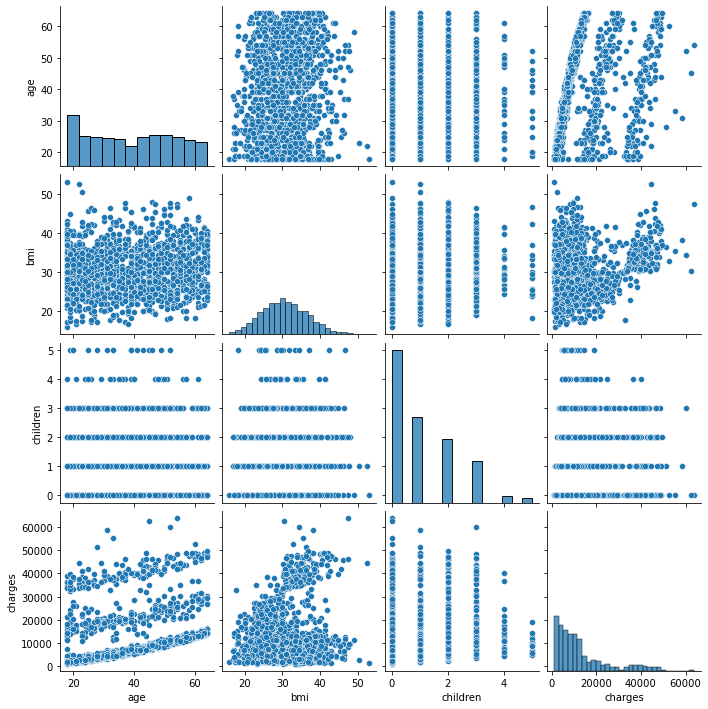

In [19]:
sns.pairplot(data)

## Sex
- Let's explore the sex column

In [13]:
# First five rows
data['sex'].head()

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object

In [14]:
# Checking the unique values
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

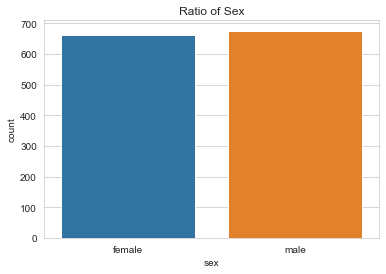

In [ ]:
# Distribution of Female to Male
sns.countplot(data['sex'])
plt.title("Ratio of Sex")
plt.show()

- We can deduce that the ratio of Male to Female is quite fair and proportional

## bmi

In [51]:
data['bmi'].head()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi'>

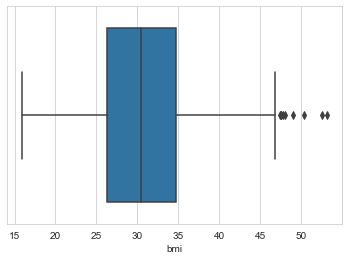

In [57]:
# A boxplot to check the presence of outliers
sns.boxplot(data['bmi'])

- We can see that 

<AxesSubplot:xlabel='bmi', ylabel='Density'>

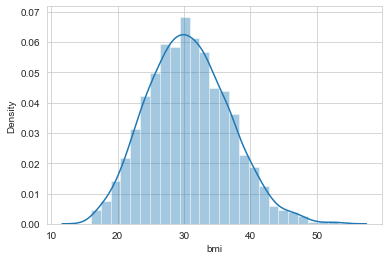

In [66]:
sns.distplot(data['bmi'])

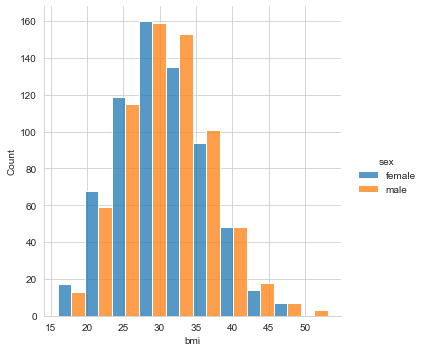

In [56]:
sns.displot(data, x="bmi", hue="sex", multiple="dodge", bins = 10)
plt.show()

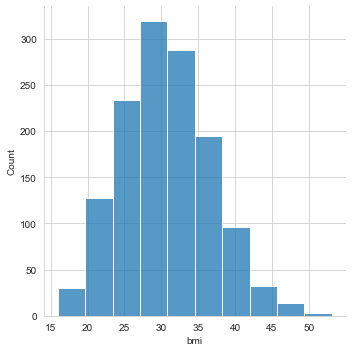

In [61]:
sns.displot(data['bmi'], bins = 10)

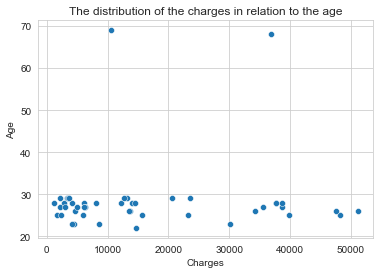

In [49]:
x = data['charges']
y = data['age'].value_counts()
#plt.plot(x, y)
sns.scatterplot(x, y)
plt.xlabel('Charges')
plt.ylabel('Age')
plt.title("The distribution of the charges in relation to the age")
plt.show()

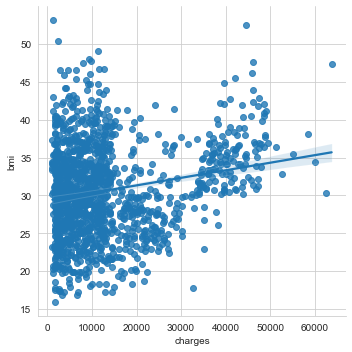

In [62]:
sns.lmplot(x ='charges', y ='bmi', data = data)
#plt.title("")
plt.show()

In [65]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


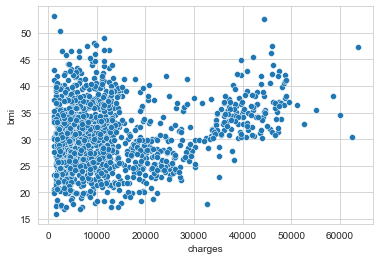

In [63]:
sns.scatterplot(x ='charges', y ='bmi', data = data, hue = '')
#plt.title("")
plt.show()

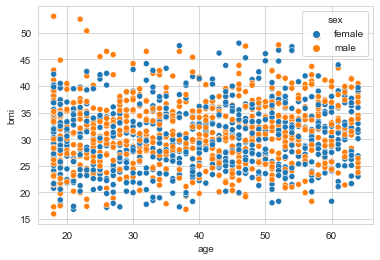

In [64]:
sns.scatterplot(x ='age', y ='bmi', data = data, hue = 'sex')
#plt.title("")
plt.show()

In [79]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [78]:
#sns.catplot(data, x="region", y="children", kind="bar")
sns.catplot(data, x="age", y="deck", errorbar=("pi", 95), kind="bar")
plt.show()

ValueError: Could not interpret input 'children'

## Target Column (Charges)

In [67]:
data['charges'].head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

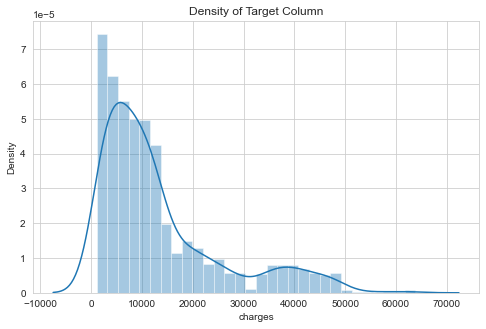

In [71]:
plt.figure(figsize = (8, 5))
sns.distplot(data['charges'])
plt.title('Density of Target Column')
plt.show()

<Figure size 576x360 with 0 Axes>

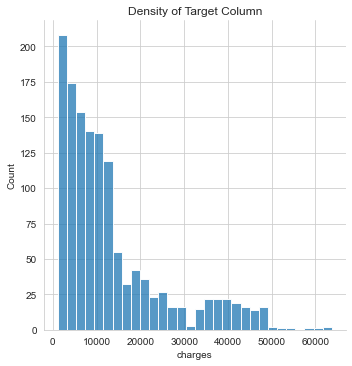

In [72]:
plt.figure(figsize = (8, 5))
sns.displot(data['charges'])
plt.title('Density of Target Column')
plt.show()

In [73]:
df = data.copy()

## Encoding Categorical Data

In [74]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [75]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing